## 作业1：使用sklearn库的现成模型对auto-mpg数据中的weight和mpg变量进行线性回归。
[sklearn.linear_model.LinearRegression — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

In [9]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("./data/auto-mpg.data", delim_whitespace=True, names=columns)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [15]:
print(cars.shape)

(398, 9)


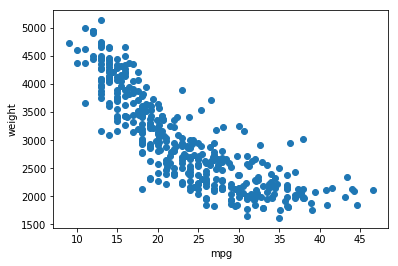

In [12]:
plt.scatter(cars['mpg'],cars['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

In [22]:
#区分训练集和测试集
X = cars['mpg']
Y = cars['weight']
X_train = X[:-80]
X_test  = X[-80:]

Y_train = Y[:-80]
Y_test  = Y[-80:]

print(Y_train.shape)

(318,)


In [40]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(cars[["weight"]], cars["mpg"])
predictions = lr.predict(cars[["weight"]])
print(predictions[0:5])
print(cars["mpg"][0:5])

[19.41852276 17.96764345 19.94053224 19.96356207 19.84073631]
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


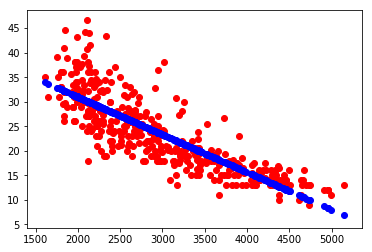

In [41]:
plt.scatter(cars["weight"], cars["mpg"], c='red')
plt.scatter(cars["weight"], predictions, c='blue')
plt.show()

In [42]:
lr = LinearRegression()
lr.fit(cars[["weight"]], cars["mpg"])
predictions = lr.predict(cars[["weight"]])
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(cars["mpg"], predictions)
print(mse)

18.780939734628394


## 2.使用sklearn库的现成模型对admission数据中的gpa和admit进行逻辑回归。
[sklearn.linear_model.LogisticRegression — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
admissions = pd.read_csv("./data/admissions.csv")
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


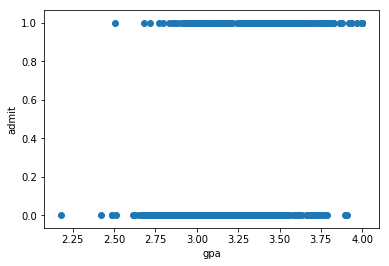

In [48]:
plt.scatter(admissions['gpa'], admissions['admit'])
plt.xlabel('gpa')
plt.ylabel('admit')
plt.show()
#由此可见GPA和录取特别有关系，而且这是一个分类问题，所以使用逻辑回归

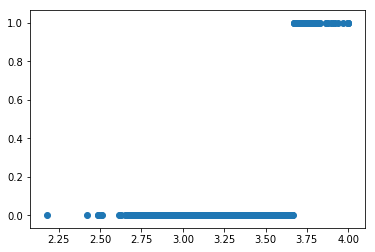

In [49]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"], fitted_labels)
plt.show()

In [54]:
acc = logistic_model.score(admissions["admit"].values.reshape(-1, 1),fitted_labels)
print(acc)

0.9285714285714286
